Nhóm 05 - Bài toán hồi quy

#Dự đoán tuổi của các thể bào ngư thông qua các chỉ số vật lý

<!-- <img src="https://www.nutritionadvance.com/wp-content/uploads/2019/05/fresh-abalone-shellfish-on-a-green-leaf.jpg" width="400"> -->

<img src="https://telegraph-image-bak.pages.dev/file/7f65e16f2ad2c8763a9ff.jpg" width="600">

---

##Import Modules

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install colorama

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import MODULES
import pandas as pd
import optuna
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from colorama import Fore, Style, init;
from scipy.stats import skew  # Import the skew function
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer , SimpleImputer
# Normalization
from sklearn.preprocessing import QuantileTransformer , PowerTransformer , LabelEncoder,MinMaxScaler
# Model Classifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import VotingClassifier, VotingRegressor
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import *
# Model Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
# Paellete
palette = ['#FBBACD', '#F99DB9', '#F881A6', '#D68F6F', '#BC8B69']

color_palette = sns.color_palette(palette)
# Remove Warnings
import warnings
warnings.filterwarnings("ignore")

# Set the option to display all columns
pd.set_option('display.max_columns', None)

<style>
    @keyframes textAnimation9 {
        0% { color: #D35400; }
        50% { color: #E67E22; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F9EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #D35400; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Import Dataset </p>
</div>


In [ ]:
# Load Data
tr_d = pd.read_csv('/content/drive/MyDrive/File_csv/train.csv')
te_d = pd.read_csv('/content/drive/MyDrive/File_csv/train.csv')
s_d = pd.read_csv('/content/drive/MyDrive/File_csv/sample_submission.csv')
O_D = pd.read_csv('/content/drive/MyDrive/File_csv/Original.csv')

In [ ]:
# Original column names
original_columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                    'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# New column names
new_columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
               'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Rename columns
O_D.columns = new_columns

In [ ]:
# Concating df_org and df_train DataFrames
tr_d = pd.concat([tr_d, O_D], ignore_index=True)
tr_d.reset_index(inplace=True,drop=True)

<style>
    @keyframes textAnimation9 {
        0% { color: #D35400; }
        50% { color: #E67E22; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F9EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #D35400; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Dataset Overview </p>
</div>


## **Overview of Data Function**
- The Overview of Data function serves the purpose of providing a comprehensive summary of a dataset. It takes data as input and returns various key insights about the dataset.

> ## **Functionality**
 - Load Data: The function loads the provided dataset.
- Overview: It gives an overview of the dataset by providing information such as the head of the dataset, its shape, information about data types, statistical summary, null values, and duplicate values.

In [ ]:
from colorama import Fore, Style
import plotly.express as px

def PrintColor(text: str, color=Fore.GREEN, style=Style.NORMAL):
    "Prints color outputs using colorama using a text F-string"
    print(style + color + text + Style.RESET_ALL)

def print_yellow_large(text):
    PrintColor(text, Fore.YELLOW + Style.BRIGHT)

def print_separator(symbol='-', length=60):
    separator = symbol * length
    PrintColor(separator, Fore.YELLOW + Style.BRIGHT)

# Main Heading
def print_heading(text):
    print_separator()
    PrintColor('╔══════════════════════════════════════════════════════════╗', Fore.YELLOW + Style.BRIGHT)
    print_yellow_large(f" {text.upper():^42} ")
    PrintColor('╚══════════════════════════════════════════════════════════╝', Fore.YELLOW + Style.BRIGHT)
    print_separator()
def data_overview(tr_d, te_d):
    # Display head of the training dataset nicely
    print_heading("The Head Of Training Dataset")
    print(tr_d.head(5).to_string(index=False))
    print()

    # Display head of the test dataset nicely
    print_heading("The Head Of Test Dataset")
    print(te_d.head(5).to_string(index=False))
    print()

    # Shapes of Train
    print_heading("Shape Information")
    PrintColor(f"The Shape Of Train Data: Rows - {tr_d.shape[0]}, Columns - {tr_d.shape[1]}", Fore.MAGENTA)
    PrintColor(f"The Shape Of Test Data: Rows - {te_d.shape[0]}, Columns - {te_d.shape[1]}", Fore.MAGENTA)
    print()

    # Info of Train Dataset
    print_heading("Dataset Information")
    PrintColor(f"The Info Of Train Dataset\n{tr_d.info()}", Fore.MAGENTA)
    PrintColor(f"The Info Of Test Dataset\n{te_d.info()}", Fore.MAGENTA)
    print()

    # Describe Train
    print_heading("Numerical Summary")
    PrintColor(f"The Numerical Summary of Train\n{tr_d.describe()}", Fore.MAGENTA)
    PrintColor(f"The Numerical Summary of Test\n{te_d.describe()}", Fore.MAGENTA)
    print()

    # Null Values in Train
    print_heading("Null Values")
    PrintColor("Null Values in Train\n" + str(tr_d.isnull().sum()), Fore.MAGENTA)
    PrintColor("Null Values in Test\n" + str(te_d.isnull().sum()), Fore.MAGENTA)
    print()

    # Duplicates Values in Train
    print_heading("Duplicate Values")
    PrintColor(f"Duplicates Values in Train: {tr_d.duplicated().sum()}", Fore.MAGENTA)
    PrintColor(f"Duplicates Values in Test: {te_d.duplicated().sum()}", Fore.MAGENTA)
    print()



In [ ]:
# Data Overview
data_overview(tr_d, te_d)

------------------------------------------------------------
╔══════════════════════════════════════════════════════════╗
        THE HEAD OF TRAINING DATASET        
╚══════════════════════════════════════════════════════════╝
------------------------------------------------------------
Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  Shell weight  Rings
  M   0.455     0.365   0.095        0.5140          0.2245          0.1010         0.150     15
  M   0.350     0.265   0.090        0.2255          0.0995          0.0485         0.070      7
  F   0.530     0.420   0.135        0.6770          0.2565          0.1415         0.210      9
  M   0.440     0.365   0.125        0.5160          0.2155          0.1140         0.155     10
  I   0.330     0.255   0.080        0.2050          0.0895          0.0395         0.055      7

------------------------------------------------------------
╔══════════════════════════════════════════════════════════╗
      

**Data Have No Null Values and Not Any Duplicates**

##Exploratory Data Analysis (EDA)

In [ ]:
# Import thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm;

In [ ]:
# # Load dữ liệu từ URL
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
# # Tên các cột
# columns = ["Sex", "Length", "Diameter", "Height", "Whole_weight",
#            "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]
# # Đọc dữ liệu vào DataFrame
# abalone_data_eda = pd.read_csv(url, header=None, names=columns)

abalone_data_eda = pd.read_csv("/content/drive/MyDrive/File_csv/train.csv")


In [ ]:
print("Thông tin về dataset:\n")
abalone_data_eda.info()
print("\nMô tả dataset:\n", abalone_data_eda.describe().T, "\n")
print("5 dòng đầu của dataset:\n", abalone_data_eda.head(), "\n")
print("5 dòng cuối của dataset:\n", abalone_data_eda.tail(), "\n")

Thông tin về dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB

Mô tả dataset:
                  count      mean       std     min     25%     50%     75%  \
Length          4177.0  0.523992  0.120093  0.0750  0.4500  0.5450   0.615   
Diameter        4177.0  0.407881  0.099240  0.0550  0.3500  0.4250   0.480   
Height          4177.0  0.139516  0.041827  0.0000  0.1150  0

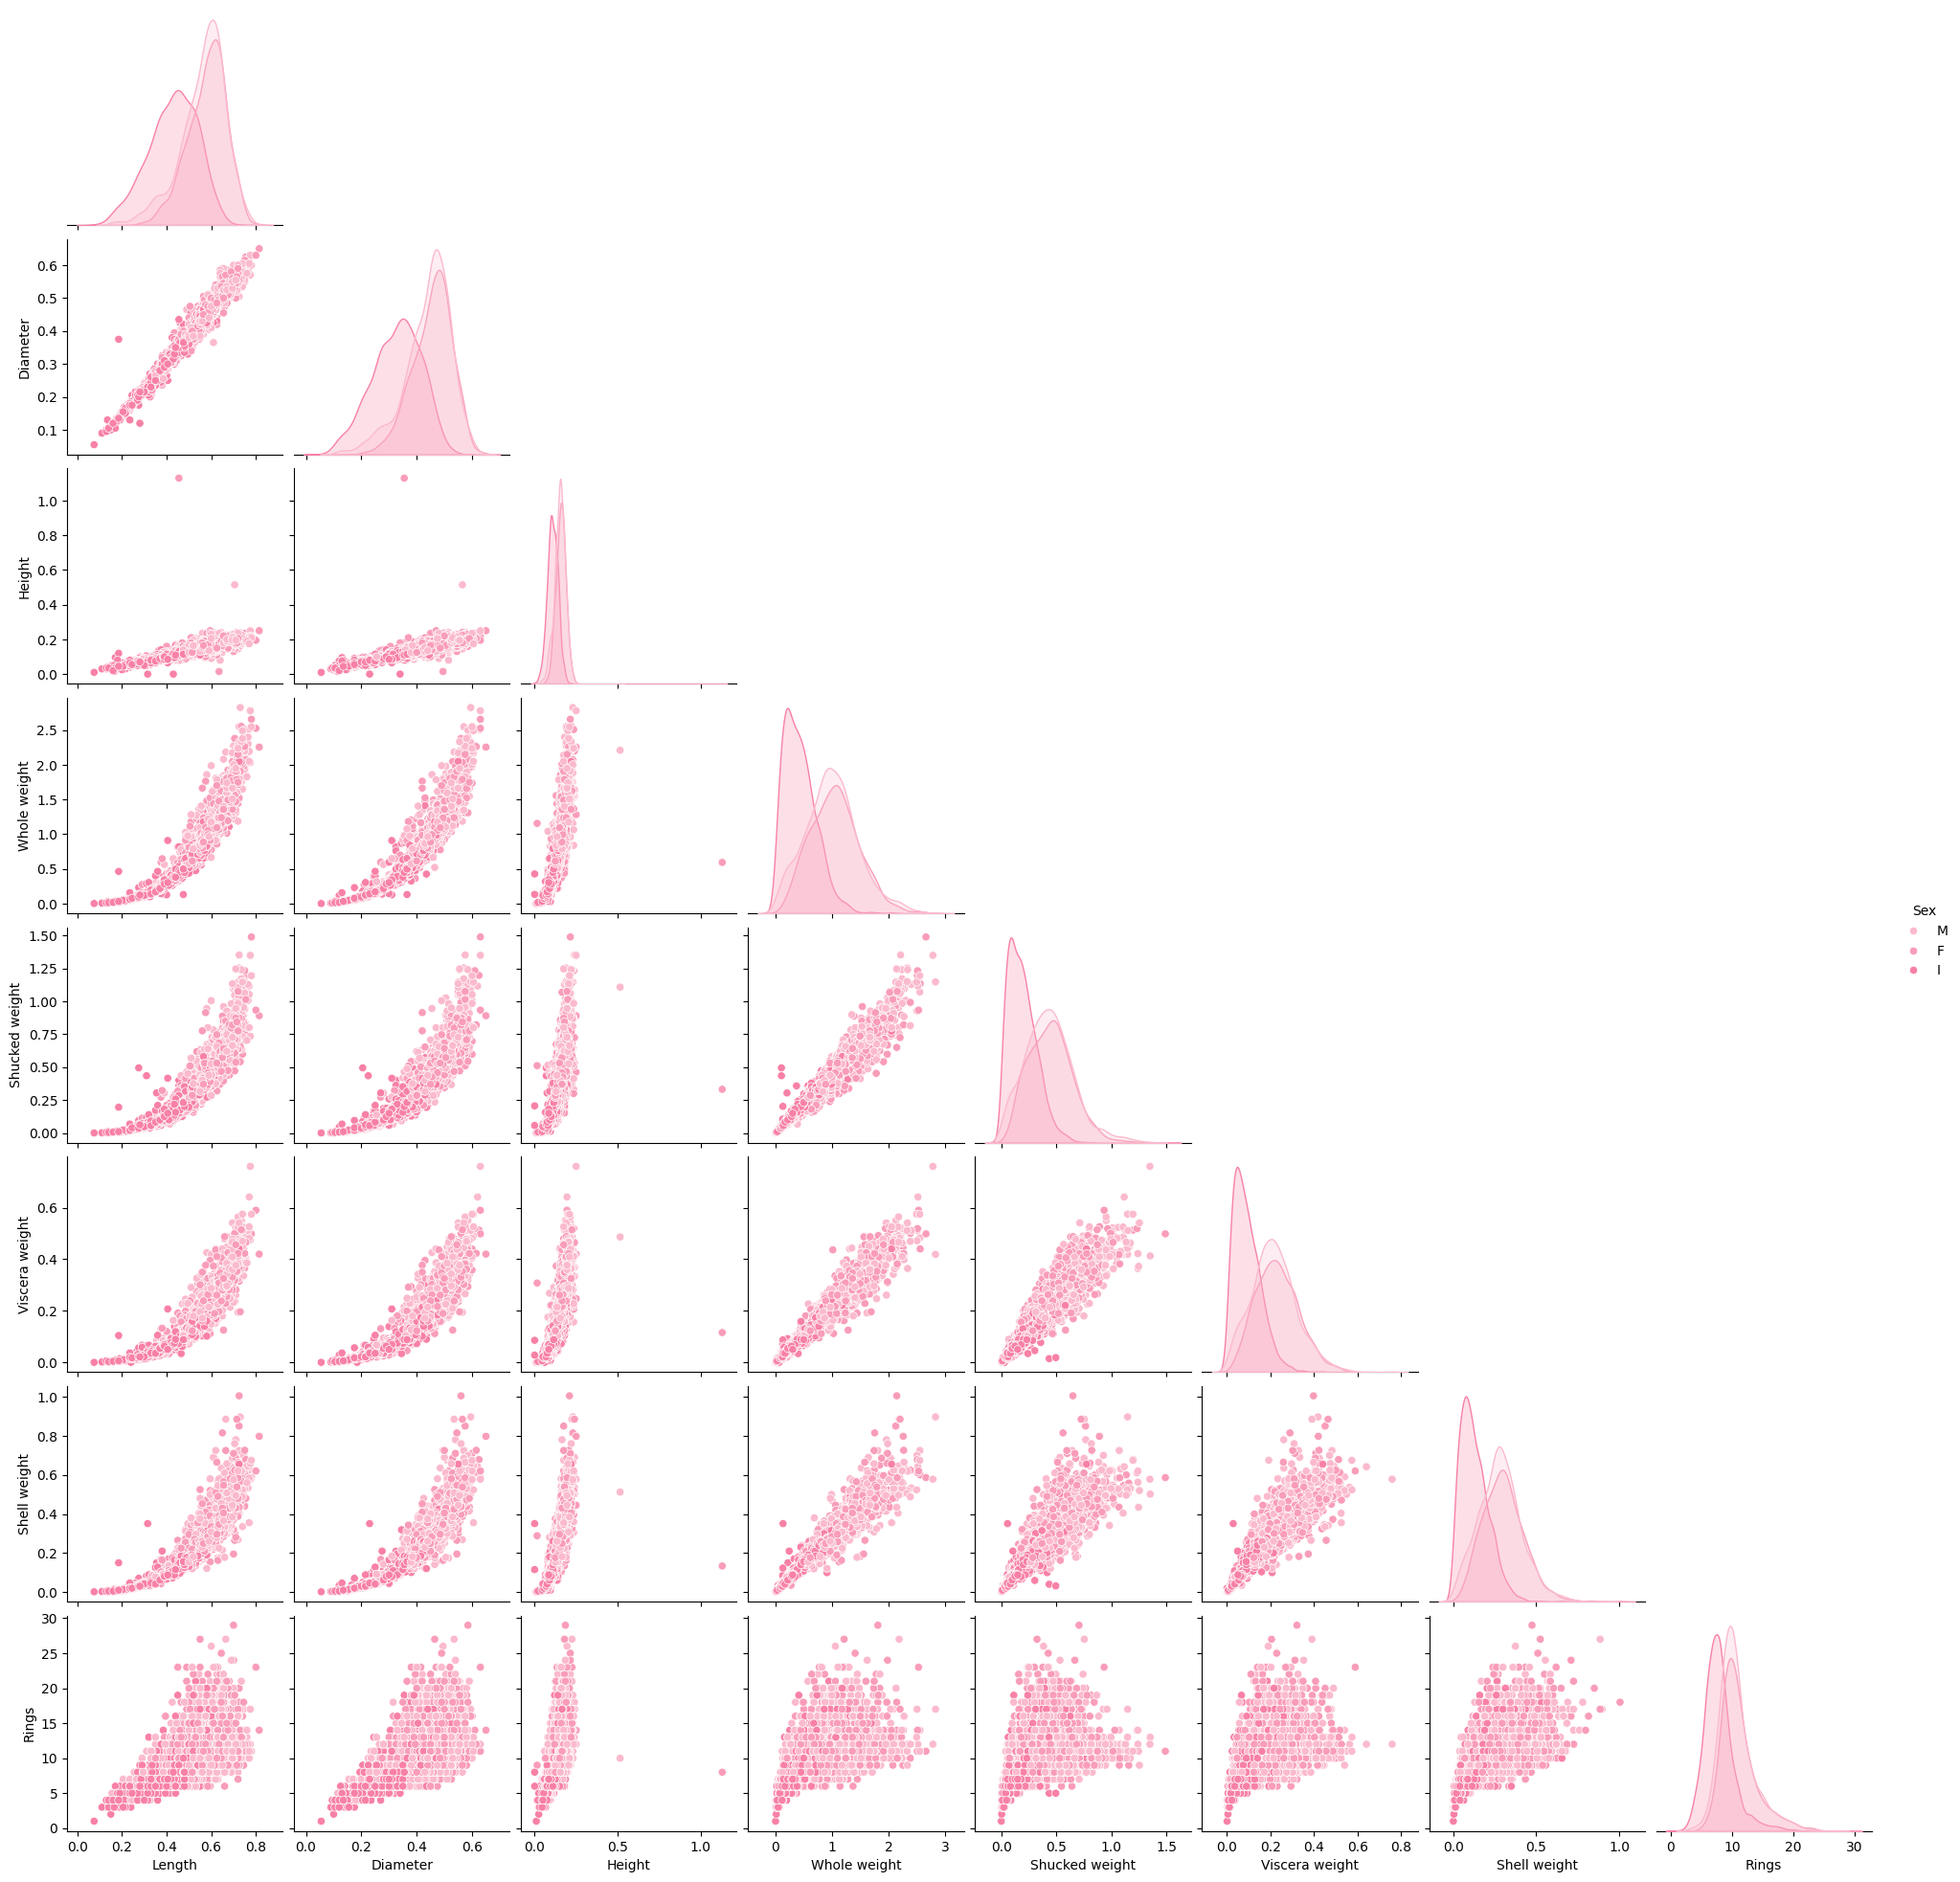

In [ ]:
# Create a dictionary to map colors to unique values of the 'Sex' column
sex_colors = {'M': palette[0] , 'F': palette[1], 'I': palette[2]}

# Creating the pairplot with the specified palette for categorical variables
sns.pairplot(abalone_data_eda, corner=True, hue='Sex', palette=sex_colors)
plt.show()

###Kiểm tra giá trị bị thiếu (Missing values)

In [ ]:
# Kiểm tra giá trị bị thiếu
missing_values = abalone_data_eda.isnull().sum()
print("Số lượng giá trị bị thiếu trong mỗi cột:")
print(missing_values)


Số lượng giá trị bị thiếu trong mỗi cột:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


Không có giá trị thiếu ở bất kỳ cột nào.

###Phân tích đơn biến (Univariate analysis)

**Phần trăm giá trị của biến phân loại (Sex)**

In [ ]:
# # Function to Plot Single Pie and Bar Plot
def single_plot_distribution(column_name, dataframe):
    # Get the value counts of the specified column
    value_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]})

    # Donut pie chart
    pie_colors = palette[0:3]
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16)

    # Bar chart
    bar_colors = palette[0:3]
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=bar_colors,)
    ax2.set_title(f'Count of {column_name}', fontsize=16)
    ax2.set_xlabel(column_name, fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45)

    # Show the plots
    plt.tight_layout()
    plt.show()

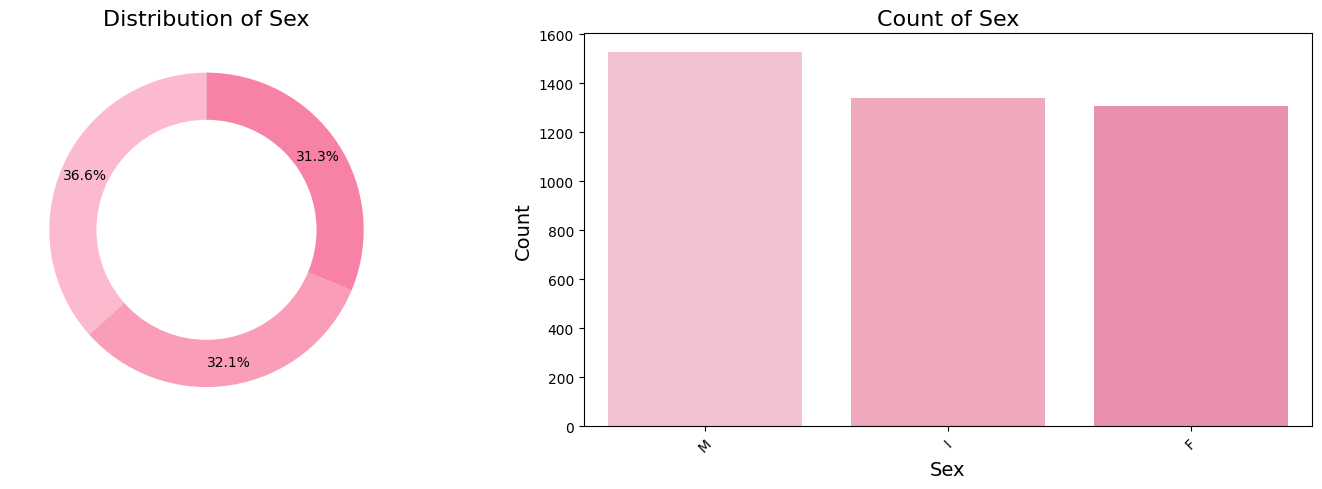

In [ ]:
single_plot_distribution("Sex", abalone_data_eda)

**Biểu đồ phân phối và đường phân phối chuẩn của các biến giá trị kiểu số**

![normal dist](https://soc.utah.edu/sociology3112/_resources/images/normal.png)

*Ảnh tượng trưng cho Dữ liệu tuân theo phân phối chuẩn (bên trái) và Dữ liệu phân phối lệch (bên phải)*

In [ ]:
def checkNormalDistributon(data, feature) :
  plt.figure(figsize=(8, 4))
  sns.histplot(data[feature], kde=True, stat="density", bins=30, label='Data')
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, data[feature].mean(), data[feature].std())
  plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
  plt.legend(loc='upper right')
  plt.title(f"Histogram and Normal Distribution for {feature}")
  plt.show()

  # Kiểm tra phân phối chuẩn cho cột 'feature', ví dụ
  stat, p = shapiro(data[feature])
  print('\nStatistics=%.3f, p=%.3f' % (stat, p))

  # Diễn giải kết quả
  alpha = 0.05
  if p > alpha:
      print('Result from Shapiro-Wilk: Sample looks Gaussian (fail to reject H0)\n')
  else:
      print('Result from Shapiro-Wilk: Sample does not look Gaussian (reject H0)\n')


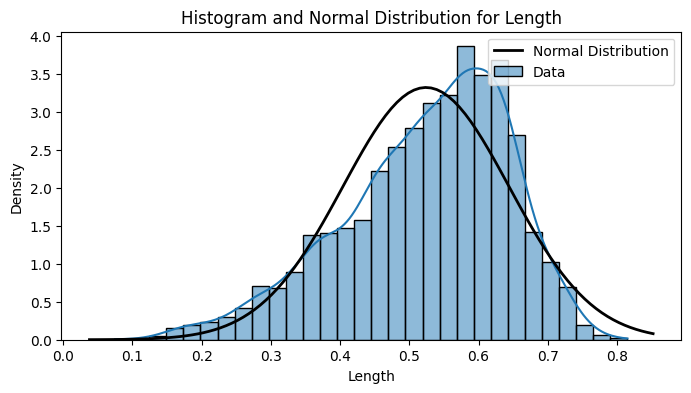


Statistics=0.970, p=0.000
Result from Shapiro-Wilk: Sample does not look Gaussian (reject H0)



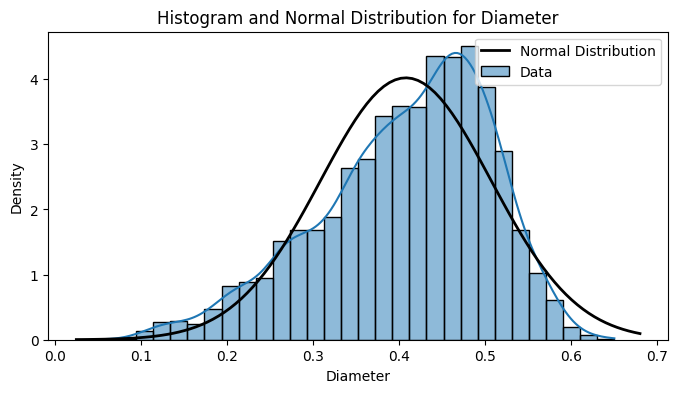


Statistics=0.970, p=0.000
Result from Shapiro-Wilk: Sample does not look Gaussian (reject H0)



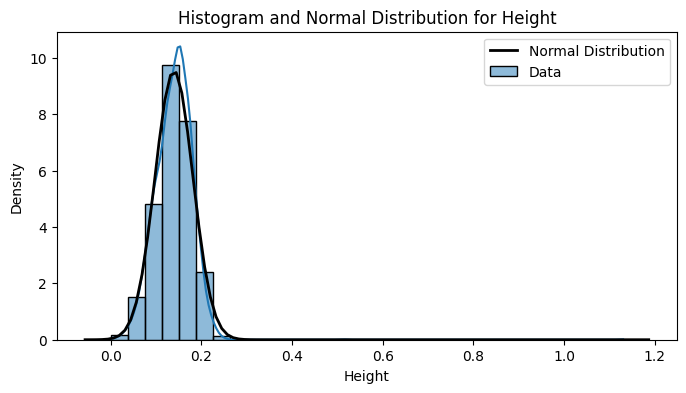


Statistics=0.890, p=0.000
Result from Shapiro-Wilk: Sample does not look Gaussian (reject H0)



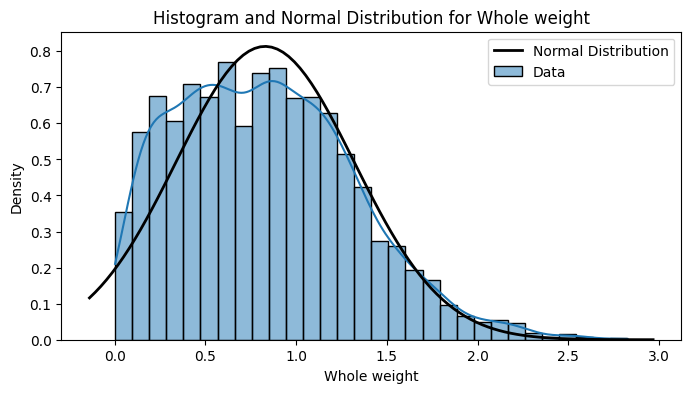


Statistics=0.972, p=0.000
Result from Shapiro-Wilk: Sample does not look Gaussian (reject H0)



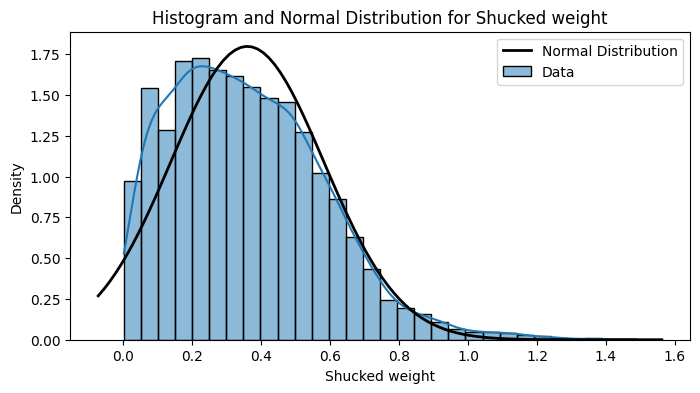


Statistics=0.962, p=0.000
Result from Shapiro-Wilk: Sample does not look Gaussian (reject H0)



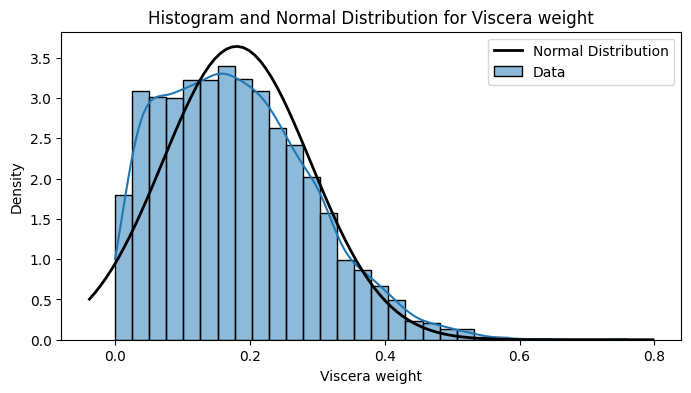


Statistics=0.968, p=0.000
Result from Shapiro-Wilk: Sample does not look Gaussian (reject H0)



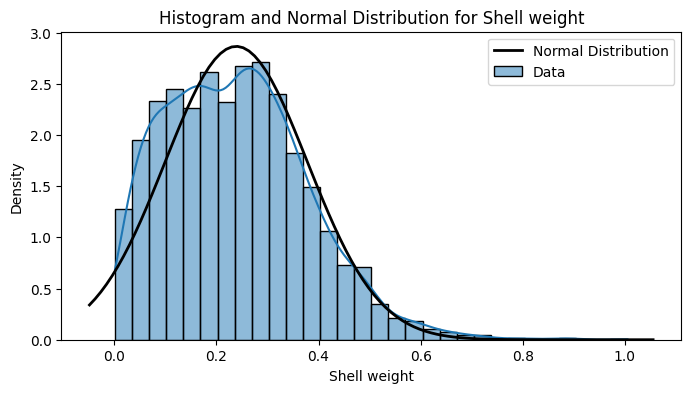


Statistics=0.970, p=0.000
Result from Shapiro-Wilk: Sample does not look Gaussian (reject H0)



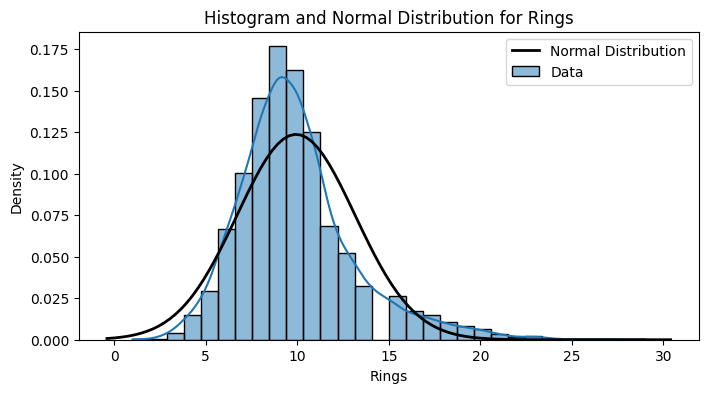


Statistics=0.931, p=0.000
Result from Shapiro-Wilk: Sample does not look Gaussian (reject H0)



In [ ]:
# Vẽ biểu đồ và đường phân phối chuẩn của các biến còn lại (trừ biến Sex)
checkNormalDistributon(abalone_data_eda, "Length")
checkNormalDistributon(abalone_data_eda, "Diameter")
checkNormalDistributon(abalone_data_eda, "Height")
checkNormalDistributon(abalone_data_eda, "Whole weight")
checkNormalDistributon(abalone_data_eda, "Shucked weight")
checkNormalDistributon(abalone_data_eda, "Viscera weight")
checkNormalDistributon(abalone_data_eda, "Shell weight")
checkNormalDistributon(abalone_data_eda, "Rings")

Không có bất kỳ biến đặc tính nào tuân theo phân phối chuẩn Gauss, ở các bước tiếp theo, ta không nên sử dụng những phương pháp dựa vào giả định phân phối chuẩn.

###Phân tích hai biến (Bivariate analysis)

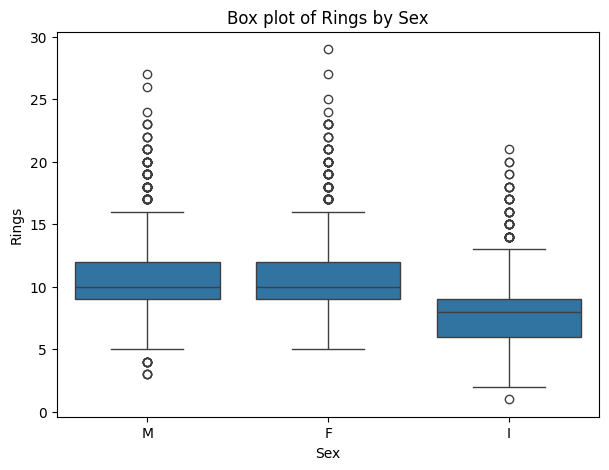

In [ ]:
# Vẽ box plot thể hiện phân phối của biến mục tiêu Rings theo Sex
plt.figure(figsize=(7, 5))
sns.boxplot(x='Sex', y='Rings', data=abalone_data_eda)
plt.title('Box plot of Rings by Sex')
plt.xlabel('Sex')
plt.ylabel('Rings')
plt.show()

Sự phân bố số vòng của các cá thể có giới tính M và F có sự tương đồng, trong đó F sẽ cao hơn một tí. Trong khi đó, có sự khác biệt đáng kể trong phân phối giữa giá trị I và hai giá trị M và F, suy ra biến Sex có ảnh hưởng đến biến mục tiêu.

###Phân tích đa biến (Multivariate analysis)

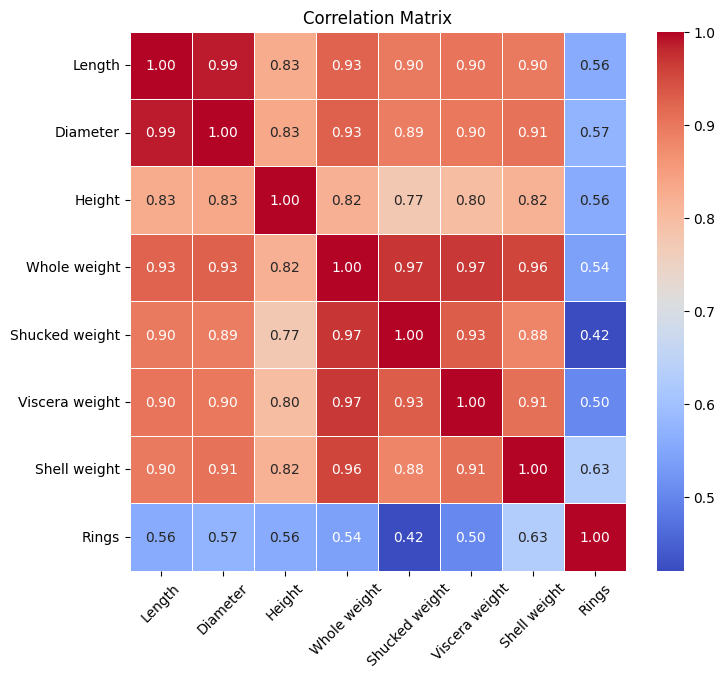


Correlation with target variable (Rings):

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

Biến ảnh hưởng đáng kể đến biến mục tiêu (Rings):

['Rings', 'Shell weight', 'Diameter', 'Height', 'Length', 'Whole weight', 'Viscera weight', 'Shucked weight']


In [ ]:
# Tạo một bản sao của dữ liệu Abalone để không thay đổi dữ liệu gốc
abalone_data_eda_copy = abalone_data_eda.copy()

# Loại bỏ cột 'Sex' từ bản sao
abalone_data_eda_no_sex = abalone_data_eda_copy.drop(columns=['Sex'])

# Biến mục tiêu
target_variable = 'Rings'

# Tính ma trận tương quan
correlation_matrix = abalone_data_eda_no_sex.corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tick_params(axis='x', rotation=45)
plt.show()

# Tính tương quan của các biến đối với biến mục tiêu
correlation_with_target = abalone_data_eda_no_sex.corr()[target_variable].sort_values(ascending=False)

# In ra tương quan của các biến đối với biến mục tiêu
print("\nCorrelation with target variable ({}):\n".format(target_variable))
print(correlation_with_target)

# Chọn ngưỡng tương quan để xác định biến ảnh hưởng
threshold = 0.2  # Có thể điều chỉnh ngưỡng này
significant_variables = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()

# Biến ảnh hưởng đến biến mục tiêu
print("\nBiến ảnh hưởng đáng kể đến biến mục tiêu ({}):\n".format(target_variable))
print(significant_variables)


##Data Preprocessing

###Feature Engineering

**In this Section , i will do some features Enginnering and make some new Columns from the Given Columns.**

In [ ]:
# # Lets Do Some Feature Enginnering

def Feature_Engineering(df):

    # 1. Shell Volume
    df['Shell Volume'] = df['Length'] * df['Diameter'] * df['Height']

    # 2. Meat Ratio
    df['Meat Ratio'] = df['Whole weight'] / df['Shell weight']

    # 3. Body Mass Index (BMI)
    df['BMI'] = df['Whole weight'] / (df['Length'] ** 2)

    # 4. Shell Surface Area (assuming cylindrical shell)
    df['Shell Surface Area'] = 2 * (df['Length'] * df['Diameter'] + df['Length'] * df['Height'] + df['Diameter'] * df['Height'])

    # 5. Volume to Weight Ratio
    df['Volume to Weight Ratio'] = df['Shell Volume'] / df['Whole weight']


    # 7. Shell Weight to Length Ratio
    df['Shell Weight to Length Ratio'] = df['Shell weight'] / df['Length']

    # 8. Meat Weight to Length Ratio
    df['Meat Weight to Length Ratio'] = df['Whole weight'] / df['Length']

    # Return Data
    return df

# Train And test
tr_d = Feature_Engineering(tr_d)
te_d = Feature_Engineering(te_d)

###Checking Outliers


In [ ]:
# Num _COLS
NUM_COLS_F = [col for col in tr_d.columns if tr_d[col].dtype == 'float']

# BoxPLot To Identify Outliers
fig = go.Figure()

# Define the number of rows and columns for subplots
num_rows = 4  # 4 rows
num_cols = 4  # 4 columns

# Create subplots with appropriate titles
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=NUM_COLS_F[:num_rows * num_cols])

# Loop through each row of subplots
for i in range(num_rows):
    # Loop through each subplot in the row
    for j in range(num_cols):
        # Calculate the index of the current numerical column
        index = i * num_cols + j
        # Check if the index is within the range of available numerical columns
        if index < len(NUM_COLS_F):
            # Add a box plot for the current numerical column to the subplot
            fig.add_trace(go.Box(x=tr_d[NUM_COLS_F[index]], name=NUM_COLS_F[index], marker_color=palette[index % len(palette)]), row=i + 1, col=j + 1)

# Update layout
fig.update_layout(height=800, width=2000, title_text="Boxplot of Numerical Columns")

# Show the plot
fig.show()

###Numerical Feature Distribution


In [ ]:
# Function to Plot Numerical Distribution
def plot_numerical_distribution_with_hue(data, num_cols, hue_col='Sex', figsize=(25, 25), dpi=100):
    # Create subplots
    rows = (len(num_cols) + 1) // 2
    fig, ax = plt.subplots(rows, 2, figsize=figsize, dpi=dpi)
    ax = ax.flatten()

    # Define the palette
    palette = ['#328ca9', '#0e6ea9', '#2c4ea3', '#193882', '#102446']

    # Loop through each column and plot the distribution with hue
    for i, column in enumerate(num_cols):
        sns.histplot(data=data, x=column, hue=hue_col, ax=ax[i], kde=True, palette=palette)
        ax[i].set_title(f'{column} Distribution', size=14)
        ax[i].set_xlabel(None)
        ax[i].set_ylabel(None)

        # Calculate skewness
        skewness = skew(data[column].dropna())
        skew_label = f'Skewness: {skewness:.2f}'

        # Add skewness annotation
        ax[i].annotate(skew_label, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')

    # Remove any extra subplots
    for j in range(len(num_cols), len(ax)):
        fig.delaxes(ax[j])

    # Set Tight Layout
    plt.tight_layout()

    # Show the plot
    plt.show()

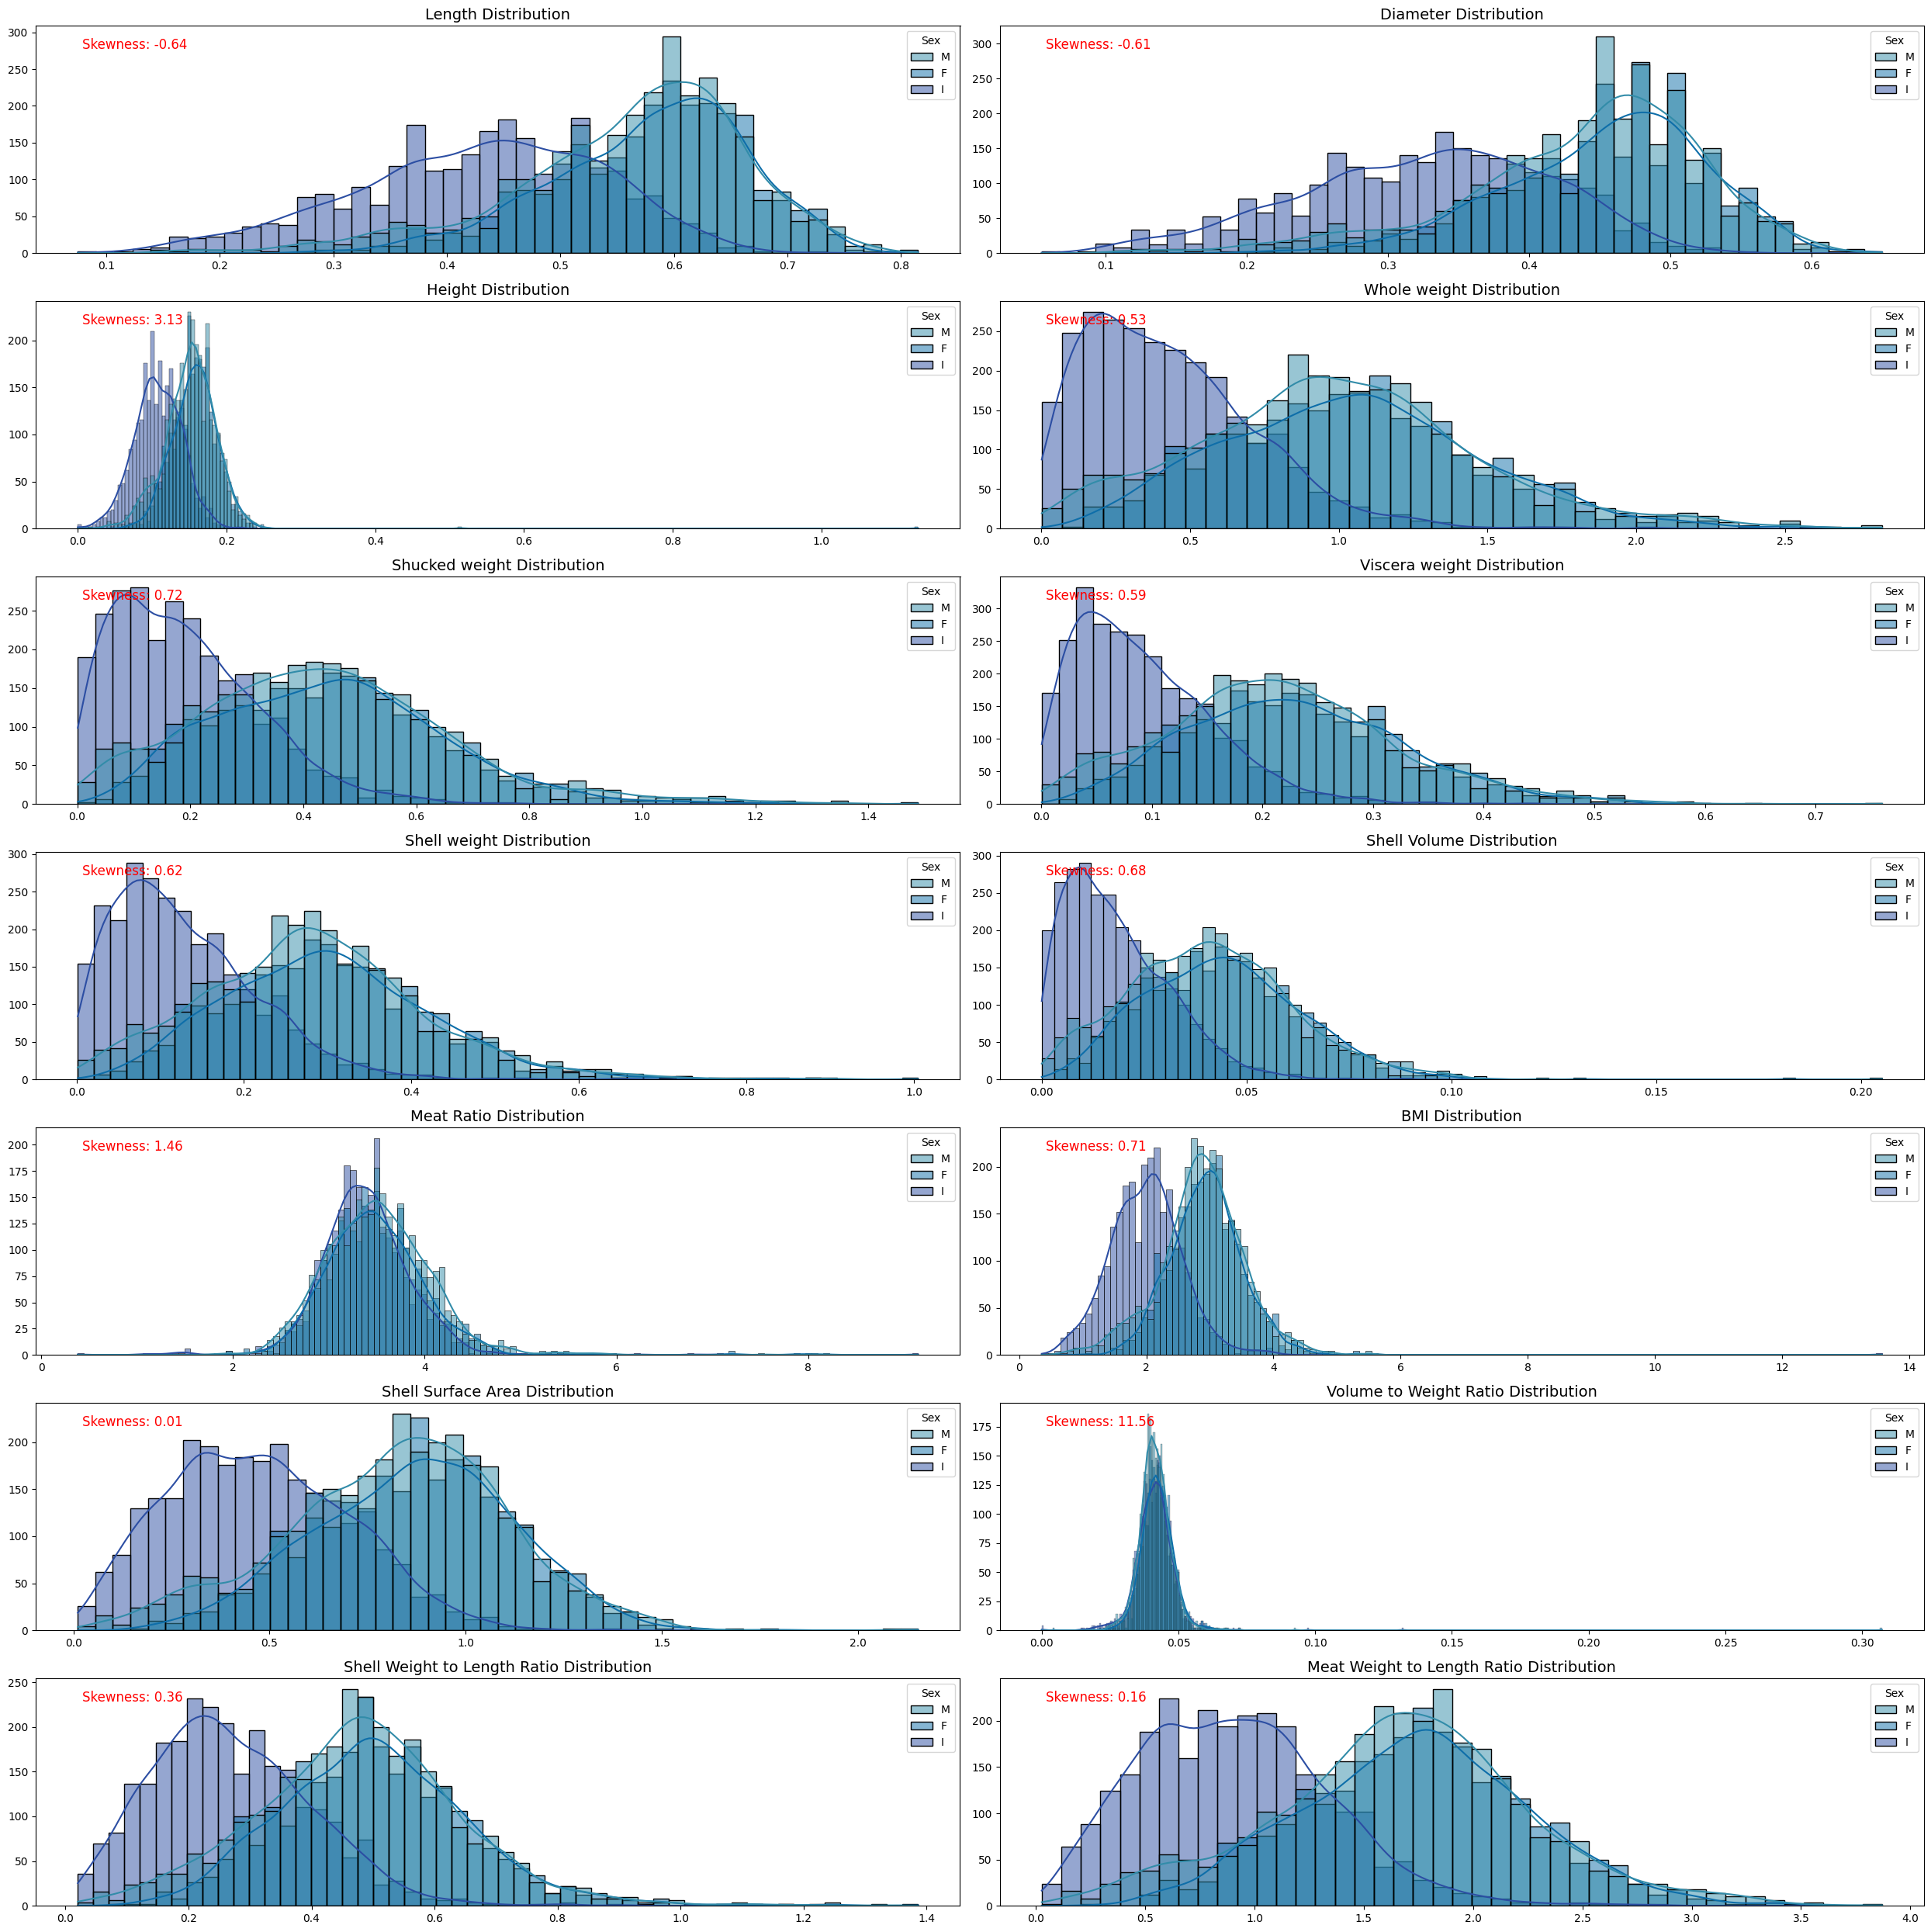

In [ ]:
# Cols to Plot
NUM_COLS_F = [col for col in tr_d.columns if tr_d[col].dtype == 'float']
# Numerical Distribution of Age Vs Fare
plot_numerical_distribution_with_hue(tr_d,NUM_COLS_F,'Sex')

###Normalization

**Here we will Normalize the Data using , Quantile Transformer. Quantile Transformer is One Of Best Normalization Method.**

In [ ]:
# Function to Scale Data
def apply_scaling(data, columns, scaler_type):
    # Check the type of scaler and initialize the appropriate scaler object
    if scaler_type == 'S':
        scaler = StandardScaler()  # Initialize StandardScaler
    elif scaler_type == 'M':
        scaler = MinMaxScaler()  # Initialize MinMaxScaler
    elif scaler_type == 'Q':
        scaler = QuantileTransformer(output_distribution='normal')  # Initialize QuantileTransformer
    else:
        raise ValueError("Invalid scaler type. Choose 'S' for StandardScaler, 'M' for MinMaxScaler, or 'Q' for QuantileTransformer.")

    # Create a copy of the input data to avoid modifying the original data
    scaled_data = data.copy()

    # Loop through each column to be scaled
    for col in columns:
        # Apply the scaler to the current column and update the data with the scaled values
        scaled_data[col] = scaler.fit_transform(scaled_data[[col]])

    # Return the scaled data
    return scaled_data

In [ ]:
# Specify columns and scaler type
columns_to_scale = [col for col in tr_d.columns if tr_d[col].dtype == 'float']
scaler_type = 'M'

# Apply scaling to training data
tr_d_scaled = apply_scaling(tr_d, columns_to_scale, scaler_type)
# Apply the same scaling to testing data
te_d_scaled = apply_scaling(te_d, columns_to_scale, scaler_type)
PrintColor('Data Scaled Done')

Data Scaled Done


> ### **Observation**

- Now Our Data is Less Skewed and Looking Gaussian


<style>
    @keyframes textAnimation9 {
        0% { color: #D35400; }
        50% { color: #E67E22; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F9EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #D35400; font-weight: bold; animation: textAnimation9 10s infinite alternate;"> Correlation Analysis </p>
</div>


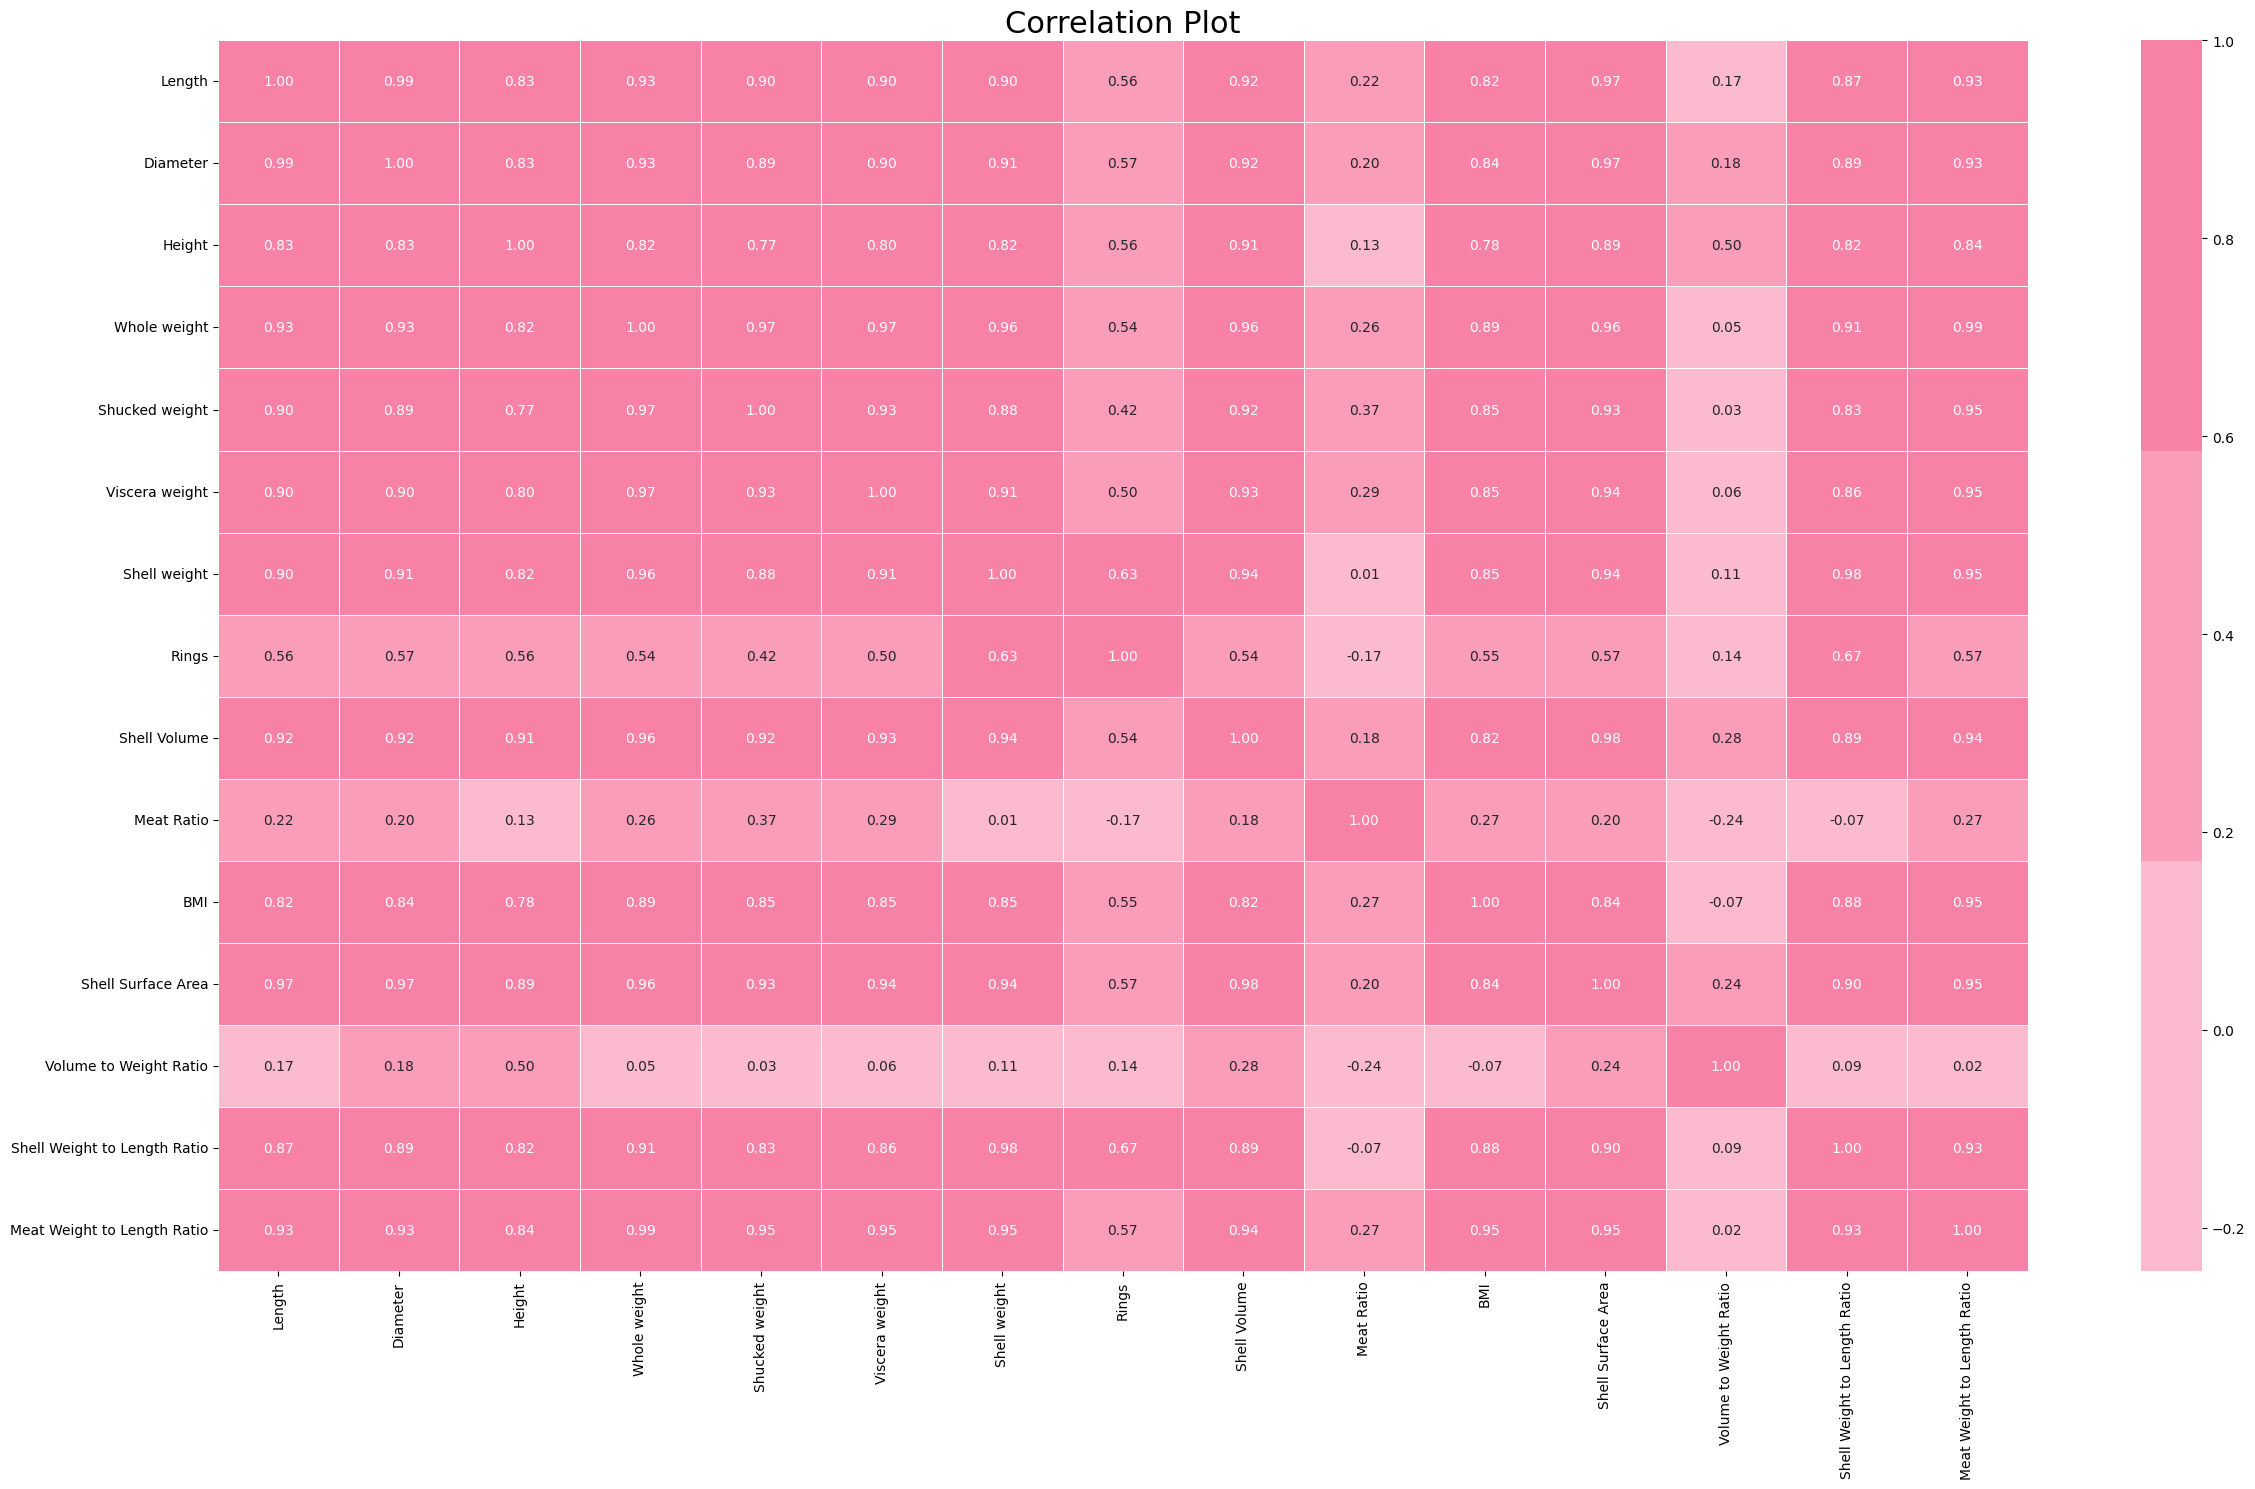

In [ ]:
# Select only numeric columns
N_d = tr_d.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = N_d.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap=palette[0:3], fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot', fontsize=22)
plt.tight_layout()
plt.show()

<style>
    @keyframes textAnimation9 {
        0% { color: #D35400; }
        50% { color: #E67E22; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F9EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #D35400; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Encoding </p>
</div>


In [ ]:
# Defining the categorical columns to encode
CAT_COL_E = ['Sex']

# Function to encode columns using One-Hot Encoding
def Encode(data, columns):
    # Perform One-Hot Encoding
    encoded_data = pd.get_dummies(data, columns=columns)

    # Return the encoded data
    return encoded_data

# Encoder Train Test
tr_d = Encode(tr_d, CAT_COL_E)
te_d = Encode(te_d, CAT_COL_E)
PrintColor('Data is Encoded Successfully')

Data is Encoded Successfully


<style>
    @keyframes textAnimation9 {
        0% { color: #D35400; }
        50% { color: #E67E22; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 50px; padding: 50px; box-shadow: 0 10px 20px rgba(0, 0, 0, 0.8); background-color: #F9EBEA; max-width: 800px; margin: 70px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 40px; text-align: center; color: #D35400; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Modelling</p>
</div>


In [ ]:
# X and y
X_T = tr_d.drop('Rings', axis=1)
y_T = tr_d['Rings']

# Train Test Split
X_TR, X_TE, Y_TR, Y_TE = train_test_split(X_T, y_T, test_size=0.1, random_state=42)

# Print Shapes
PrintColor(f"Training set shape - X: {X_TR.shape}, y: {Y_TR.shape}")
PrintColor(f"Testing set shape - X: {X_TE.shape}, y: {Y_TE.shape}")

Training set shape - X: (7518, 17), y: (7518,)
Testing set shape - X: (836, 17), y: (836,)


## Ba Mô Hình Học Máy

### LightGBM

<style>
    @keyframes textAnimation9 {
        0% { color: #D35400; }
        50% { color: #E67E22; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F9EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #D35400; font-weight: bold; animation: textAnimation9 10s infinite alternate;">LightGBM  </p>
</div>


In [ ]:
# # # ╔══════════════════════════════════════════════════════════╗
# # #                         Params < LGB Regressor
# # # ╚══════════════════════════════════════════════════════════╝
lgb_params = {
     'n_estimators': 855,
     'learning_rate': 0.03188929865038832,
     'max_depth': 9,
     'reg_alpha': 0.05242740495804349,
     'reg_lambda': 0.3389170890195228,
     'num_leaves': 54,
     'subsample': 0.6251285203728641,
     'colsample_bytree': 0.5205780443860558,
    'verbose' : -1
}
# # # ╔══════════════════════════════════════════════════════════╗
# # #                         Train < LGB Regressor
# # # ╚══════════════════════════════════════════════════════════╝
L_BASE = lgb.LGBMRegressor(**lgb_params)
V_CV = cross_val_score(L_BASE,
                         X_T,
                         y_T,
                         scoring='neg_mean_squared_log_error',
                         cv=15,
                         n_jobs=-1)
# # # ╔══════════════════════════════════════════════════════════╗
# # #                         RMSE < LGB Regressor
# # # ╚══════════════════════════════════════════════════════════╝
print_heading(f"The Average RMSLE Of Voting Regressor is : {-V_CV.mean()}")
# # # ╔══════════════════════════════════════════════════════════╗
# # #                         Submission < LGB Regressor
# # # ╚══════════════════════════════════════════════════════════╝
# # # Fit the LGB
L_BASE.fit(X_T, y_T)
# Test Pred
#test_pred_L_BASE = L_BASE.predict(te_d)
# Submission DF


------------------------------------------------------------
╔══════════════════════════════════════════════════════════╗
 THE AVERAGE RMSLE OF VOTING REGRESSOR IS : 0.01052250403524744 
╚══════════════════════════════════════════════════════════╝
------------------------------------------------------------


LGBMRegressor(colsample_bytree=0.5205780443860558,
              learning_rate=0.03188929865038832, max_depth=9, n_estimators=855,
              num_leaves=54, reg_alpha=0.05242740495804349,
              reg_lambda=0.3389170890195228, subsample=0.6251285203728641,
              verbose=-1)

### Catboost

<style>
    @keyframes textAnimation9 {
        0% { color: #D35400; }
        50% { color: #E67E22; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F9EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #D35400; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Catboost </p>
</div>


In [ ]:
# # # ╔══════════════════════════════════════════════════════════╗
# # #                         Params < Cat Regressor
# # # ╚══════════════════════════════════════════════════════════╝
cat_params = {
     'n_estimators': 853,
     'learning_rate': 0.10899577626375372,
     'depth': 7,
     'subsample': 0.998357427917925,
     'colsample_bylevel': 0.7340962061535496,
     'random_strength': 6.262882561405091,
     'min_data_in_leaf': 92,
    'verbose' : 0
             }
# # # ╔══════════════════════════════════════════════════════════╗
# # #                         Train < CatRegressor
# # # ╚══════════════════════════════════════════════════════════╝
C_BASE = CatBoostRegressor(**cat_params)
C_CV = cross_val_score(C_BASE,
                       X_T,
                       y_T,
                       scoring='neg_mean_squared_log_error',
                       cv=15,
                       n_jobs=-1)
# # # ╔══════════════════════════════════════════════════════════╗
# # #                         Params < RMSLE Regressor
# # # ╚══════════════════════════════════════════════════════════╝
print_heading(f"The Average RMSLE Of CatBoost Regressor is: {-C_CV.mean()}")
# # # ╔══════════════════════════════════════════════════════════╗
# # #                         Submiison < Cat Regressor
# # # ╚══════════════════════════════════════════════════════════╝
C_BASE.fit(X_T, y_T)
# Test Pred
test_pred_C_BASE = C_BASE.predict(te_d)
# Submission DF


------------------------------------------------------------
╔══════════════════════════════════════════════════════════╗
 THE AVERAGE RMSLE OF CATBOOST REGRESSOR IS: 0.008687998819935976 
╚══════════════════════════════════════════════════════════╝
------------------------------------------------------------


---

### XGBoost

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector as selector

from sklearn.metrics import make_scorer, mean_squared_log_error

In [ ]:
# # Create an XGBoost regressor
RANDOM_STATE=42
xgb_regressor = xgb.XGBRegressor(random_state=RANDOM_STATE)

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selector(dtype_include=['int64', 'float64'])),
        ('cat', categorical_transformer, selector(dtype_include=['object'])),
    ])

In [ ]:
# # Define pipeline steps
steps = [
    ('preprocessor', preprocessor),        # Step 1: Standardize the features
     ('xgb', xgb_regressor)   # Step 2: Random Forest Regressor
 ]

# # Create the pipeline
pipeline = Pipeline(steps)

In [ ]:
# # Fit the pipeline to the training data
pipeline.fit(X_T, y_T)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7802ae497460>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7802ae497...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
n_splits=5
kf = KFold(n_splits=n_splits, shuffle=False)

In [ ]:
# Define RMSLE scorer
def rmsle_score(y_true, y_pred):
    msle = mean_squared_log_error(y_true, y_pred)
    return np.sqrt(msle)

# Make scorer
rmsle_scorer = make_scorer(rmsle_score, greater_is_better=False)

In [ ]:
rmsle_scorer = make_scorer(rmsle_score, greater_is_better=False)

In [ ]:
score1 = cross_val_score(pipeline, X_T, y_T, cv=kf, scoring=rmsle_scorer)
print("K-Fold Cross Validation RMSLE Score1: ", -score1)
avg_score1 = sum(-score1) / n_splits
print("Average K-Fold Cross Validation RMSLE Score1: ", avg_score1)

K-Fold Cross Validation RMSLE Score1:  [0.08378448 0.07766847 0.08447039 0.08161742 0.07944129]
Average K-Fold Cross Validation RMSLE Score1:  0.0813964093057397


##Ensembel Learning (Stacking)

In [ ]:
# # Define the base estimators for stacking
from lightgbm import LGBMRegressor
base_estimators = [
     ('xgb', xgb.XGBRegressor(random_state=RANDOM_STATE)),
     ('catboost', CatBoostRegressor(random_state=RANDOM_STATE, verbose=False)),
     ('lgbm', LGBMRegressor(force_col_wise=True, random_state=RANDOM_STATE))
 ]

 # Define the final estimator for stacking
final_estimator = RandomForestRegressor(random_state=RANDOM_STATE)
# # Define pipeline steps for stacking
steps = [
     ('preprocessor', preprocessor),  # Step 1: Preprocessing
     ('stacking', StackingRegressor(estimators=base_estimators, final_estimator=final_estimator))  # Step 2: Stacking Regressor
 ]

# # Create the pipeline
pipeline = Pipeline(steps)

# # Fit the pipeline to the training data
pipeline.fit(X_T, y_T)

# # Evaluate the pipeline using K-Fold Cross Validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)
scores = []
for train_index, val_index in kf.split(X_T):
    X_train_fold, X_val_fold = X_T.iloc[train_index], X_T.iloc[val_index]
    y_train_fold, y_val_fold = y_T.iloc[train_index], y_T.iloc[val_index]
    score = rmsle_scorer(pipeline, X_train_fold, y_train_fold)
    scores.append(-score)  # Negate the score

# # Compute average score
avg_score = sum(scores) / n_splits

print("K-Fold Cross Validation RMSLE Scores: ", scores)
print("Average K-Fold Cross Validation RMSLE Score: ", avg_score)

[LightGBM] [Info] Total Bins 3094
[LightGBM] [Info] Number of data points in the train set: 8354, number of used features: 14
[LightGBM] [Info] Start training from score 9.933684
[LightGBM] [Info] Total Bins 3092
[LightGBM] [Info] Number of data points in the train set: 6683, number of used features: 14
[LightGBM] [Info] Start training from score 9.917552
[LightGBM] [Info] Total Bins 3092
[LightGBM] [Info] Number of data points in the train set: 6683, number of used features: 14
[LightGBM] [Info] Start training from score 9.896304
[LightGBM] [Info] Total Bins 3091
[LightGBM] [Info] Number of data points in the train set: 6683, number of used features: 14
[LightGBM] [Info] Start training from score 9.803082
[LightGBM] [Info] Total Bins 3091
[LightGBM] [Info] Number of data points in the train set: 6683, number of used features: 14
[LightGBM] [Info] Start training from score 10.032321
[LightGBM] [Info] Total Bins 3094
[LightGBM] [Info] Number of data points in the train set: 6684, number

In [ ]:
test_preds = pipeline.predict(X_T)
test_preds = np.clip(test_preds, a_min=1.0, a_max=29)
print(test_preds)

[15.27  6.69  8.66 ...  9.01  9.49 12.51]


In [ ]:
abalone_test = pd.read_csv("/content/drive/MyDrive/File_csv/train.csv")

In [ ]:
# Create the submission DataFrame with string labels
submission_df = pd.DataFrame({'Rings': test_preds})

# Save submission file
submission_df.to_csv('sample_submission.csv', index=False)

In [ ]:
sub = pd.read_csv("/content/sample_submission.csv")
sub.head()

Rings
0  15.27
1   6.69
2   8.66
3   9.22
4   7.01

---

##Deep Learning

In [ ]:
# Cài đặt các thư viện cần thiết (nếu chưa cài đặt)
!pip install tensorflow

In [ ]:
# Nhập các thư viện cần thiết
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

In [ ]:
col_except_rings = ['Length', 'Diameter', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
# Chuẩn bị dữ liệu

data_dl = pd.read_csv('/content/drive/MyDrive/File_csv/train.csv')  # Make a copy of the original DataFrame

for col in col_except_rings:
  # Detect outliers using the IQR method for the current column
  outliers_mask = detect_outliers_iqr(data_dl[col])

  # Remove outliers from the DataFrame
  data_dl = data_dl[~outliers_mask]

  # Print the number of outliers removed for the current column
  num_outliers_removed = sum(outliers_mask)
  print(f"Number of outliers removed for {col}: {num_outliers_removed}")

# Reset the index of the cleaned DataFrame
data_dl.reset_index(drop=True, inplace=True)

# Chuyển đổi biến phân loại Sex
abalone_data_deep_learning = pd.get_dummies(data_dl, columns=['Sex'])

Number of outliers removed for Length: 49
Number of outliers removed for Diameter: 12
Number of outliers removed for Whole weight: 30
Number of outliers removed for Shucked weight: 26
Number of outliers removed for Viscera weight: 14
Number of outliers removed for Shell weight: 28


26/26 [==============================] - 0s 2ms/step


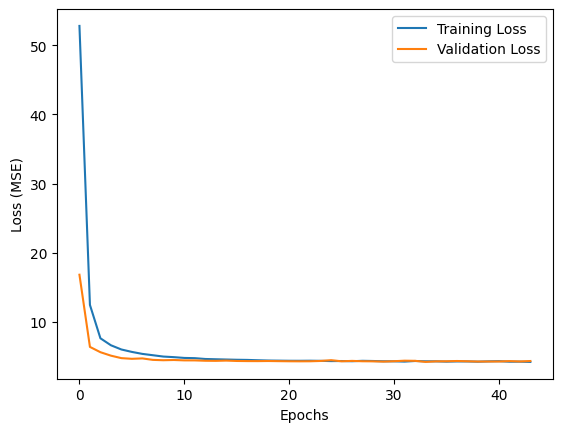

26/26 [==============================] - 0s 5ms/step


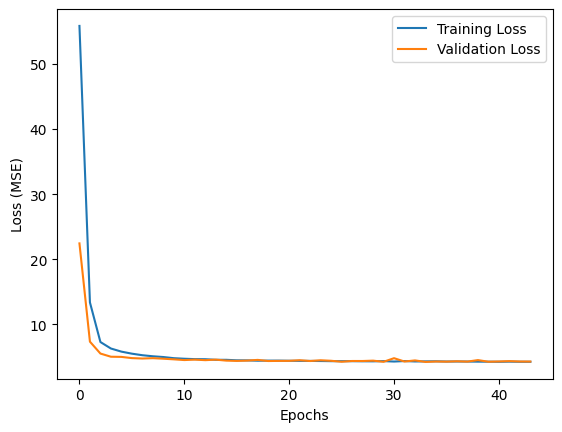

26/26 [==============================] - 0s 2ms/step


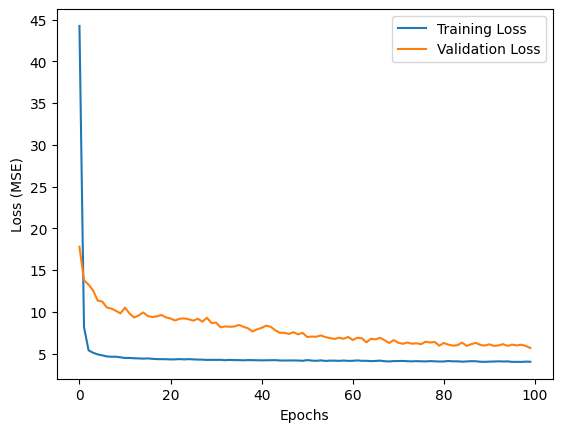

26/26 [==============================] - 0s 2ms/step


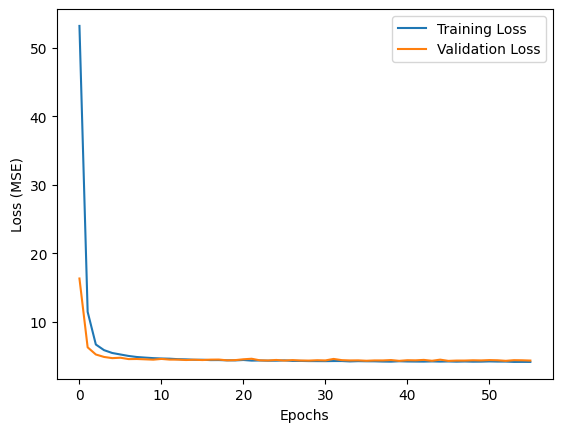

26/26 [==============================] - 0s 4ms/step


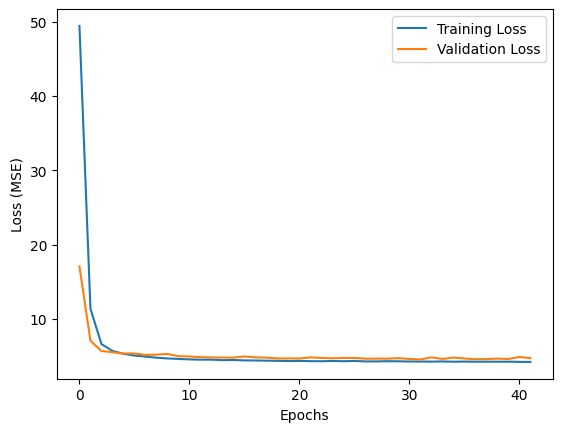

Mean RMSE: 2.1420197399193412
Standard Deviation of RMSE: 0.12236708107897971


In [ ]:
X = abalone_data_deep_learning.drop('Rings', axis=1).values
y = abalone_data_deep_learning['Rings']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Thiết lập K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Để lưu trữ kết quả RMSE
rmse_scores = []

# Hàm để tạo mô hình Sequential
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Huấn luyện và đánh giá mô hình với K-Fold
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = create_model()

  early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

  history = model.fit(X_train, y_train,
                      epochs=100,
                      batch_size=32,
                      validation_data=(X_test, y_test),
                      callbacks=[early_stopping],
                      verbose=0)
  # Dự đoán trên tập kiểm tra
  y_pred = model.predict(X_test)

  rmse = np.sqrt(np.mean((y_test - y_pred.flatten()) ** 2))
  rmse_scores.append(rmse)

  # Vẽ biểu đồ quá trình huấn luyện
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.show()

# Tính giá trị trung bình và độ lệch chuẩn của RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean RMSE: {mean_rmse}')
print(f'Standard Deviation of RMSE: {std_rmse}')

##Lưu Mô Hình

In [ ]:
# !apt-get update -qq
# !java -version

In [ ]:
!pip install sklearn2pmml
!pip install sklearn-pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.5 MB/s eta 0:00:00
  Created wheel for sklearn2pmml: filename=sklearn2pmml-0.108.0-py3-none-any.whl size=7172101 sha256=74e502cef8fa315bca78b324c160d13c5dffc140aab90ecf7a013dc2a5984eea
  Stored in directory: /root/.cache/pip/wheels/c6/51/fc/986c974dc4a8d6cd9395375816678c8860d9079284c9dbe82d
Successfully built sklearn2pmml


In [ ]:
from sklearn_pandas import DataFrameMapper
from sklearn2pmml import sklearn2pmml, PMMLPipeline

# X_T = tr_d.drop('Rings', axis=1)
# y_T = tr_d['Rings']

# mapper = DataFrameMapper([([column], None) for column in X_T.columns], df_out=True)

# newpipeline = PMMLPipeline([
#   ("mapper", mapper),
#   ('preprocessor', preprocessor),
#   ('regressor', StackingRegressor(estimators=base_estimators, final_estimator=final_estimator))
# ])

#newpipeline.fit(X_T, y_T)

sklearn2pmml(pipeline, "stacking_model.pmml", with_repr = True)